<h1>Model development</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
#create linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
X = df[['highway-mpg']]
Y = df['price']

In [8]:
#fit the linear model using highwaympg
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
Yhat=lm.predict(X)
Yhat

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682, 14593.03788682, 15414.77126514,
       15414.77126514, 17879.97140011, 20345.17153508, 20345.17153508,
       21988.63829172, -5128.5631929 ,  3088.77059031,  3088.77059031,
        4732.23734696,  7197.43748192, 13771.3045085 ,  7197.43748192,
        7197.43748192,  7197.43748192, 13771.3045085 , 13771.3045085 ,
       18701.70477843, -5950.29657123,  7197.43748192,  3910.50396864,
       10484.37099521, 10484.37099521, 10484.37099521, 10484.37099521,
       11306.10437353, 11306.10437353, 11306.10437353, 11306.10437353,
       15414.77126514, 12949.57113018, 14593.03788682, 14593.03788682,
       22810.37167004, 22810.37167004, 24453.83842668, 12949.57113018,
        7197.43748192,  7197.43748192,  7197.43748192,  7197.43748192,
       19523.43815675, 19523.43815675, 19523.43815675, 19523.43815675,
      

In [10]:
#find intercept
lm.intercept_

38423.305858157415

In [11]:
lm.coef_

array([-821.73337832])

In [12]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [13]:
#train model using engine size
lm1 = LinearRegression()
lm1.fit(df[['engine-size']], df['price'])
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
lm1.coef_


array([166.86001569])

In [16]:
lm1.intercept_

-7963.338906281042

<h2>Multiple Linear Regression</h2>

In [17]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [18]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
lm.intercept_

-15806.624626329234

In [20]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

In [21]:
lm2 = LinearRegression()
Z = df[['normalized-losses', 'highway-mpg']]
Y = df['price']
lm2.fit(Z, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [23]:
lm2.intercept_

38201.31327245728

In [24]:
import seaborn as sns
%matplotlib inline

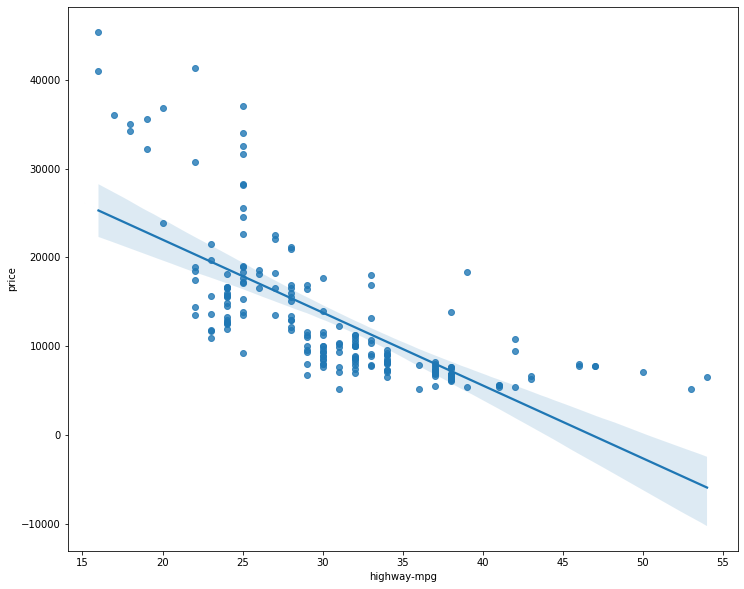

In [25]:
lm = LinearRegression()
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data=df)

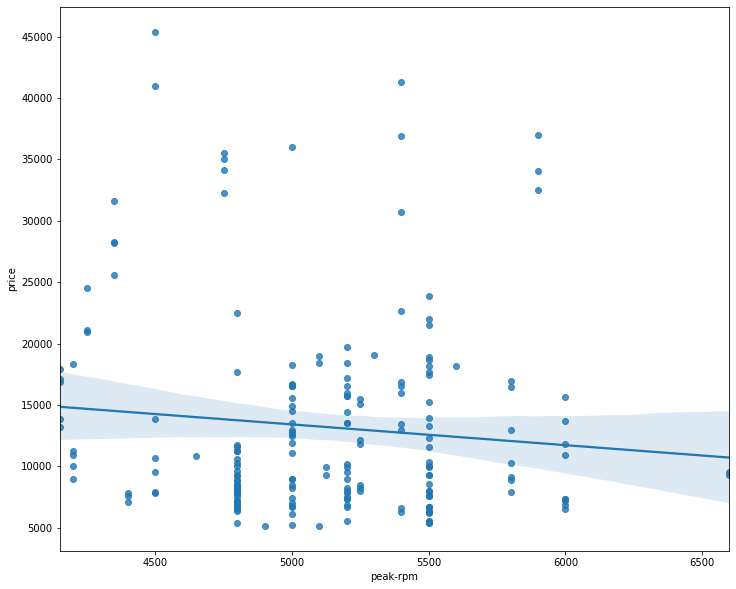

In [27]:
plt.figure(figsize=(width, height))
sns.regplot(x='peak-rpm', y='price', data=df)

In [28]:
#verify correlation
df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

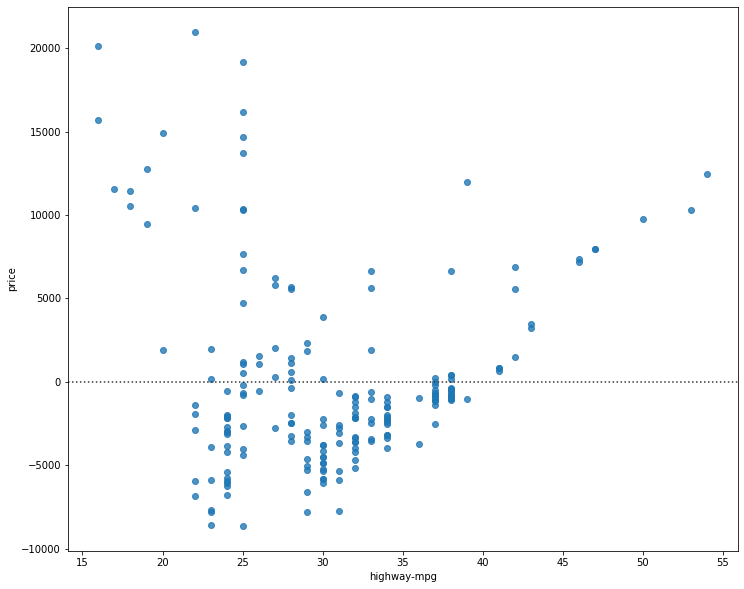

In [29]:
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.</p>

<h3>Multiple Linear Regression</h3>

In [31]:
lm = LinearRegression()
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])
Y_hat = lm.predict(Z)
Y_hat

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097, 10722.32509097, 17804.80307397,
       18063.72662867, 19320.78745066, 26968.56492801, 27674.72007721,
       28191.0677239 ,   650.62317688,  5648.50489642,  5813.27443123,
        5478.81383232,  5370.64136587,  8739.61952024,  5799.04215638,
        5902.61157827,  5902.61157827,  9036.2046829 , 11863.43973759,
       18767.70667001,  4808.3090102 ,  5693.32889063,  4006.47212651,
        6118.73075572,  6194.05397163,  6448.26982534,  6514.17763926,
        9478.65495235,  9728.16310506,  9798.77861998, 10118.90228761,
       11178.86719942, 10423.81935057,  9463.46710755, 12626.61544369,
       34470.03895495, 34470.03895495, 43996.52260522,  5265.67702191,
        5565.15645357,  5588.69495854,  5777.00299832,  5800.5415033 ,
        7337.21461795,  7337.21461795,  7360.75312292, 10536.2966792 ,
      

plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>
    
<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 
$$


<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$


<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$

In [34]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [35]:
x = df['highway-mpg']
y = df['price']

In [36]:
# Use a polynomial of the 3rd order 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


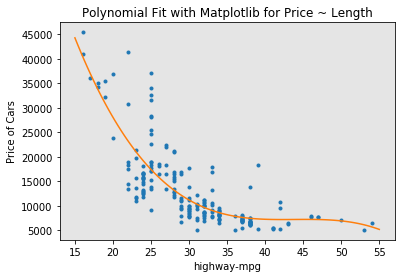

In [37]:
PlotPolly(p, x, y, 'highway-mpg')

In [38]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


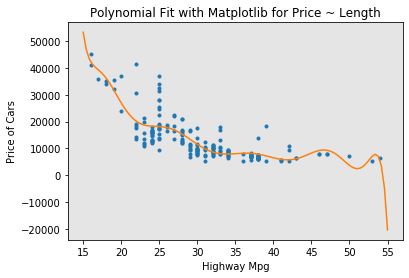

In [41]:
#create 11th order polynomial model
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)

PlotPolly(p1,x,y, 'Highway Mpg')

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [44]:
Z_pr=pr.fit_transform(Z)

In [45]:
Z.shape

(201, 4)

In [46]:
Z_pr.shape

(201, 15)

<p>Data Pipelines simplify the steps of processing the data. Use the module Pipeline to create a pipeline</p>

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [48]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [49]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [50]:
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [51]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [52]:
#Creates a pipeline that standardizes the data, perform prediction using a linear regression
Input=[('scale', StandardScaler()), ('model', LinearRegression())]

pipe=Pipeline(Input)
pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [54]:
#highway mpg fit
lm = LinearRegression()
lm.fit(X,Y)
print(' The R-square is:', lm.score(X,Y))

 The R-square is: 0.4965911884339176


In [55]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [58]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [59]:
Y_predict_multifit = lm.predict(Z)

In [60]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [61]:
from sklearn.metrics import r2_score

In [62]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [63]:
mean_squared_error(df['price'], p(x))

20474146.426361218

In [64]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [65]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

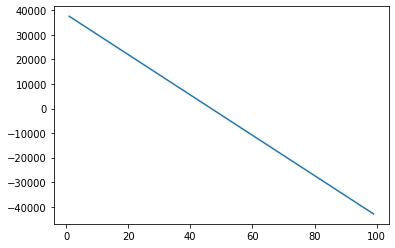

In [67]:
plt.plot(new_input, yhat)
plt.show()

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>


<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>

<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.</p>